In [4]:
from modules.util import load_data
from modules.GNN import load_model

dataset, data, G, nodes = load_data('citeseer')
model = load_model("trained_GCNs/GCN-citeseer", dataset)



In [22]:
from torcheval.metrics.functional import multiclass_f1_score
from collections import Counter

h = model(dataset.data.x, dataset.data.edge_index)
out = h.argmax(dim = 1)

f1_macro = multiclass_f1_score(out[data.test_mask], data.y[data.test_mask], 
                        num_classes=dataset.num_classes, average = 'macro').item()
f_bench = multiclass_f1_score(out[data.test_mask], data.y[data.test_mask], 
                        num_classes=dataset.num_classes, average = None).numpy()
f_bench = list(f_bench) + [f1_macro]


def labelingstats(out, data):
    correct_nodes = (out[data.test_mask] == data.y[data.test_mask]).nonzero().squeeze().flatten().numpy()
    mis_nodes = (out[data.test_mask] != data.y[data.test_mask]).nonzero().squeeze().flatten().numpy()

    TruePositive = [x[1] for x in sorted(Counter((data.y[data.test_mask])[correct_nodes].flatten().numpy()).items())]
    FN = [x[1] for x in sorted(Counter((data.y[data.test_mask])[mis_nodes].flatten().numpy()).items())]

    FP = [x[1] for x in sorted(Counter(out[data.test_mask][mis_nodes].flatten().numpy()).items())]
    
    return TP, FP, FN

TP, FP, FN = labelingstats(out, dataset.data)

In [23]:
import pandas as pd
df = pd.read_csv("results/citeseer-perturbation-results.csv")

In [24]:
import ast
df['TruePositive'] = df['TruePositive'].apply(ast.literal_eval)
df['PerturbedTestFScores'] = df['PerturbedTestFScores'].apply(ast.literal_eval)
df['FalseNegative'] = df['FalseNegative'].apply(ast.literal_eval)
df['FalsePositive'] = df['FalsePositive'].apply(ast.literal_eval)


In [25]:
df

,AdditionBudget,RemovalBudget,PerturbationStrategy,PerturbedTestFScores,TruePositive,FalseNegative,FalsePositive,DistanceMetric,DegreeMetric,PerturbedHomophily
0,0.0,0.1,remove,"[0.33502537, 0.60788864, 0.7429679, 0.71823204...","[33, 131, 383, 195, 301, 178]","[68, 120, 39, 126, 69, 69]","[63, 49, 226, 27, 64, 62]",8.499571,5.082173,0.733168
1,0.0,0.1,remove,"[0.36458334, 0.6135831, 0.73674065, 0.7119266,...","[35, 131, 382, 194, 306, 176]","[66, 120, 40, 127, 64, 71]","[56, 45, 233, 30, 63, 61]",8.275188,4.901662,0.739373
2,0.0,0.1,remove,"[0.35532996, 0.618267, 0.74757284, 0.71402544,...","[35, 132, 385, 196, 301, 179]","[66, 119, 37, 125, 69, 68]","[61, 44, 223, 32, 66, 58]",8.185830,5.009459,0.737822
3,0.0,0.1,remove,"[0.35643566, 0.6009389, 0.74202895, 0.7166362,...","[36, 128, 384, 196, 302, 176]","[65, 123, 38, 125, 68, 71]","[65, 47, 229, 30, 62, 57]",8.529564,5.001401,0.738442
4,0.0,0.1,remove,"[0.36, 0.5854801, 0.7441406, 0.71402544, 0.824...","[36, 125, 381, 196, 302, 181]","[65, 126, 41, 125, 68, 66]","[63, 51, 221, 32, 61, 63]",8.284492,5.021157,0.737822
...,...,...,...,...,...,...,...,...,...,...
1736,0.5,0.5,addremove,"[0.21818183, 0.40455842, 0.52964425, 0.4242424...","[18, 71, 402, 91, 163, 102]","[83, 180, 20, 230, 207, 145]","[46, 29, 694, 17, 38, 41]",8.321391,3.542802,0.395216
1737,0.5,0.5,addremove,"[0.21348314, 0.37758112, 0.52879584, 0.4149184...","[19, 64, 404, 89, 175, 87]","[82, 187, 18, 232, 195, 160]","[58, 24, 702, 19, 40, 31]",8.358672,3.564153,0.392770
1738,0.5,0.5,addremove,"[0.22485207, 0.38348082, 0.5345502, 0.3961814,...","[19, 65, 410, 83, 178, 86]","[82, 186, 12, 238, 192, 161]","[49, 23, 702, 15, 38, 44]",8.319546,3.558378,0.388693
1739,0.5,0.5,addremove,"[0.20111732, 0.37209305, 0.5256994, 0.43218386...","[18, 64, 404, 94, 155, 92]","[83, 187, 18, 227, 215, 155]","[60, 29, 711, 20, 37, 28]",8.329226,3.556152,0.381897


In [32]:
def create_df(results, val, bench):
    n = len(results.loc[0, val])
    out = pd.DataFrame()
    out['PerturbationBudget'] = results.AdditionBudget + results.RemovalBudget
    out['PerturbationStrategy'] = results.PerturbationStrategy

    classes = [[] for _ in range(n)]

    for c in range(len(results)):
        for i in range(n):
            classes[i].append(results.loc[c, val][i] - bench[i])

    for i, c in enumerate(classes):
        out[i] = c

    out = pd.melt(out, id_vars = ['PerturbationBudget', 'PerturbationStrategy'], value_vars=list(range(0, dataset.num_classes + 1)),
                    var_name='class', value_name=val)  
    return out


out = create_df(df, 'PerturbedTestFScores', f_bench)

In [33]:
out

,PerturbationBudget,PerturbationStrategy,class,PerturbedTestFScores
0,0.1,remove,0,-0.029507
1,0.1,remove,0,0.000051
2,0.1,remove,0,-0.009202
3,0.1,remove,0,-0.008096
4,0.1,remove,0,-0.004532
...,...,...,...,...
12182,1.0,addremove,6,-0.216109
12183,1.0,addremove,6,-0.226250
12184,1.0,addremove,6,-0.227413
12185,1.0,addremove,6,-0.230538


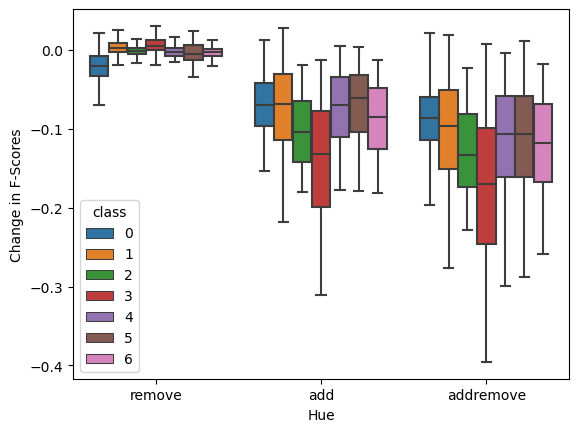

In [38]:
import seaborn as sns 
import matplotlib.pyplot as plt

vis = out[(out['PerturbationBudget'] == 0.2) & out['class'] < dataset.num_classes]

sns.boxplot(data=vis, x= 'PerturbationStrategy', y= 'PerturbedTestFScores', hue = 'class', showfliers = False)
plt.xlabel('Hue')
plt.ylabel('Change in F-Scores')
plt.show()


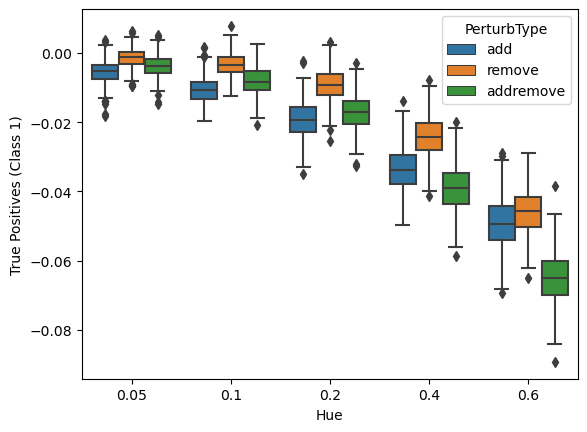

In [114]:
vis = out[out['class'] == 7]

sns.boxplot(data=vis, x= 'Budget', y= 'TP', hue = 'PerturbType', showfliers = False)
plt.xlabel('Hue')
plt.ylabel('True Positives (Class 1)')
plt.show()


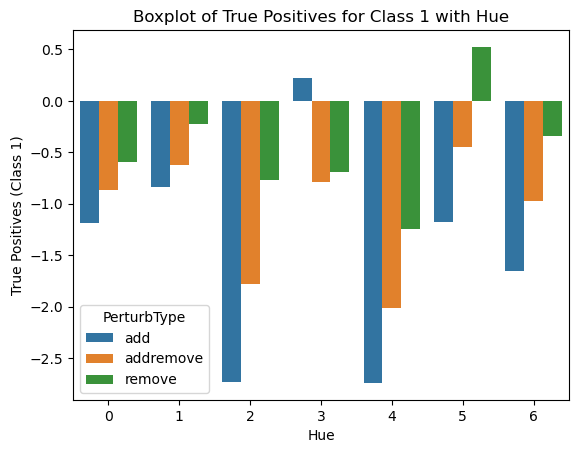

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

vis = out.groupby(by = ['Budget', 'PerturbType', 'class'], axis = 0).mean().reset_index()
sns.barplot(data=vis[vis.Budget == 0.05] , x= 'class', y= 'TP', hue = 'PerturbType')
plt.xlabel('Hue')
plt.ylabel('True Positives (Class 1)')
plt.show()



In [18]:
def addlist(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Both lists should have the same length.")
    
    return [a + b for a, b in zip(list1, list2)]
def div(list1, n):
    return [a // n for a in list1]

def divv(list1, n):
    return [a / n for a in list1]

def divlist(list1, list2):
    return [a / b for a, b in zip(list1, list2)]


In [22]:
len(results[results['Budget'] == 0.4]['PerturbedTestFScores'])

189

In [20]:
results['Budget'] = results.AddRatio + results.RemoveRatio
avg = [0]*8
for A in results[results['Budget'] == 0.4]['PerturbedTestFScores']:
    avg = addlist(avg, A)


